In [58]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


In [60]:
# 불용어 사전 다운로드 및 데이터 전처리 위한 패키지

# import nltk
nltk.download('stopwords')

import numpy as np
# import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. 데이터 수집

In [61]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [62]:
data.sample(10)

,headlines,text
40331,LPG rates hiked 1st time in 2018 amid protests...,The government has hiked the rates for liquefi...
72887,"India, Pakistan hit by 'state-sponsored' spy m...",Cybersecurity firm Symantec claimed to have de...
50722,'World's smallest fly' named after Arnold Schw...,US-based scientist Brian Brown has discovered ...
85374,Big B shares pics of rented Allahabad house he...,Actor Amitabh Bachchan took to Instagram to sh...
25527,Quadrillion tons of diamonds hidden inside Ear...,An MIT study has found that 1-2% of Earth's ol...
52604,'Padmaavat' will not be released in Gujarat: C...,Gujarat Chief Minister Vijay Rupani has said t...
57409,Jet Airways profit slumps 91% to Ã¢ÂÂ¹49.6 cr...,India's second largest airline Jet Airways on ...
17170,Nurses thrash doctor accused of molestation in...,A video which has emerged online shows several...
70274,Polish band accused of kidnapping and gang-rap...,Polish death metal band Decapitated has been a...
66617,'Need to shake the system' to make India tax c...,Finance Minister Arun Jaitley has said that th...


In [63]:
len(data)

98401

## 2. 데이터 전처리하기 (추상적 요약)
- 추상적 요약 모델 구성을 위한 텍스트 전처리
- 분석, 정제, 정규화, 불용어 제거, 데이터셋 분리, 인코딩

In [ ]:
#sample_data = pd.read_csv(os.getenv("HOME")+"/aiffel/AIFFEL_quest_rs/Exploration/Ex05/news_summary_more.csv", nrows=100000)
#print('전체 샘플수 :', (len(sample_data)))


In [ ]:
#data.head()

### null data, 의미 중복되는 data sample removal

In [64]:
# 중복 샘플 유무 확인

print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())


Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [65]:
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [66]:
data.drop_duplicates(subset = ['headlines'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


In [67]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [68]:
# 만약 null 값이 있었다면?
'''
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

'''
print("다음 단계로")

다음 단계로


### 텍스트 정규화와 불용어 제거

In [69]:
# 텍스트 정규화를 위한 사전 구성하기 
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [70]:
# 불용어 확인 

print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [71]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens


In [72]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


### 훈련 데이터 전체 text 컬럼의 데이터를 전처리 

In [73]:
clean_text = []

for sentence in data['text']:
    clean_sentence = preprocess_sentence(sentence)  # 전처리 함수 호출
    clean_text.append(clean_sentence)  # 전처리한 문장을 리스트에 추가


print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [74]:
clean_headlines = []

for sentence in data['headlines']:
    clean_sentence = preprocess_sentence(sentence)  # 전처리 함수 호출
    clean_headlines.append(clean_sentence)  # 전처리한 문장을 리스트에 추가


print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches career ml al salary hike', 'delhi techie wins free food swiggy one year cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'known hirani yrs metoo claims true sonam']


In [75]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


In [76]:
# 데이터를 DataFrame 에 재저장 

data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('다음 단계로')

다음 단계로


In [77]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [78]:
# 정제 과정에서 빈 sample 문장이 생겼다면 drop 

data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


### 훈련데이터와 테스트데이터 split 

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10029309397326
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 13
헤드라인의 평균 길이 : 7.136787364393153


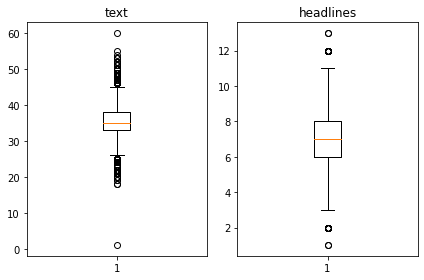

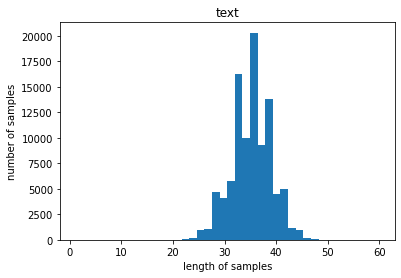

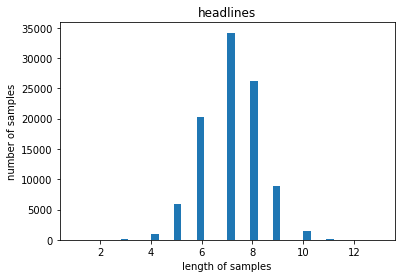

In [79]:
# sample 최대 길이 정하기

import matplotlib.pyplot as plt  # 이하, 길이 분포 출력

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [81]:
# text data 시각화 결과 확인 후, 적절한 길이 결정

text_max_len = 60
headlines_max_len = 13


In [82]:
def below_threshold_len(max_len, nested_list):  # 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))


In [85]:
# 몇 %의 샘플까지 포함하는지 확인

below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len, data['headlines'])

전체 샘플 중 길이가 60 이하인 샘플의 비율: 1.0
전체 샘플 중 길이가 13 이하인 샘플의 비율: 1.0


In [89]:
# Text와 Summary를 담고 있는 data 데이터프레임을 위에서 임의로 정의한 text_max_len과 summary_max_len의 길이보다 큰 샘플을 제외


filtered_data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len) & 
                     data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]


print('filtering 거친 전체 샘플수 :', (len(filtered_data)))
print('filtering 거친 샘플 예시 :', filtered_data.head())

filtering 거친 전체 샘플수 : 98262
filtering 거친 샘플 예시 :                                            headlines  \
0   upgrad learner switches career ml al salary hike   
1   delhi techie wins free food swiggy one year cred   
2  new zealand end rohit sharma led india match w...   
3  aegon life iterm insurance plan helps customer...   
4           known hirani yrs metoo claims true sonam   

                                                text  
0  saurav kant alumnus upgrad iiit pg program mac...  
1  kunal shah credit card bill payment platform c...  
2  new zealand defeated india wickets fourth odi ...  
3  aegon life iterm insurance plan customers enjo...  
4  speaking sexual harassment allegations rajkuma...  


In [90]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
filtered_data['decoder_input'] = filtered_data['headlines'].apply(lambda x : 'sostoken '+ x)
filtered_data['decoder_target'] = filtered_data['headlines'].apply(lambda x : x + ' eostoken')
filtered_data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches career ml al ...,upgrad learner switches career ml al salary hi...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food swiggy on...,delhi techie wins free food swiggy one year cr...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...,sostoken known hirani yrs metoo claims true sonam,known hirani yrs metoo claims true sonam eostoken


In [92]:
encoder_input = np.array(filtered_data['text']) # 인코더의 입력
decoder_input = np.array(filtered_data['decoder_input']) # 디코더의 입력
decoder_target = np.array(filtered_data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [93]:
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들기 

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[51768 83090 61827 ... 65882 69954 41047]


In [94]:
# 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [95]:
# 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리

n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19652


In [96]:
# 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78610
훈련 레이블의 개수 : 78610
테스트 데이터의 개수 : 19652
테스트 레이블의 개수 : 19652


### 정수 인코딩

In [97]:
# 단어 집합(vocabulary) 만들기 및 정수 인코딩

src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


### - 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행

In [98]:


threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')


# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])


단어 집합(vocabulary)의 크기 : 69479
등장 빈도가 6번 이하인 희귀 단어의 수: 47261
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 22218
단어 집합에서 희귀 단어의 비율: 68.02199225665308
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.4731572212132087
=3
[[370, 721, 71, 3661, 283, 4549, 1554, 176, 4008, 2851, 6265, 604, 786, 498, 595, 654, 354, 292, 3276, 53, 3707, 2011, 115, 106, 14, 2831, 2851, 7540, 173, 604], [293, 330, 585, 47, 34, 4961, 4774, 44, 5669, 7235, 4237, 443, 1087, 47, 883, 4705, 125, 726, 950, 13, 127, 493, 552, 301, 6965, 4509, 1580, 47, 1, 24, 759, 1697, 451, 5670, 350], [49, 110, 46, 71, 6556, 25, 447, 303, 932, 822, 264, 822, 49, 3521, 433, 674, 77, 2019, 1845, 753, 447, 216, 1369, 188, 31, 449, 1137, 66, 332, 4962, 49, 46, 1, 24, 3749, 4238, 12, 335]]


In [99]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [100]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30004
등장 빈도가 5번 이하인 희귀 단어의 수: 19670
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10334
단어 집합에서 희귀 단어의 비율: 65.55792560991868
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.8560228216449035


In [101]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 861, 181, 1415, 636], [1, 28, 509, 497, 969, 48], [1, 6, 18, 946, 1108, 19, 154, 467], [1, 58, 1021, 99, 353, 837, 196], [1, 119, 172, 256, 382, 334, 862, 92]]
target
decoder  [[861, 181, 1415, 636, 2], [28, 509, 497, 969, 48, 2], [6, 18, 946, 1108, 19, 154, 467, 2], [58, 1021, 99, 353, 837, 196, 2], [119, 172, 256, 382, 334, 862, 92, 2]]


In [102]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 260
삭제할 테스트 데이터의 개수 : 57
훈련 데이터의 개수 : 78350
훈련 레이블의 개수 : 78350
테스트 데이터의 개수 : 19595
테스트 레이블의 개수 : 19595


### - 패딩

In [104]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='pre')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='pre')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='pre')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='pre')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='pre')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='pre')
print('=3')

=3


## 3. 어텐션 메커니즘 사용하기 (추상적 요약)

In [105]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(enc_emb)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(enc_emb)

In [106]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [107]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 60, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 128)    256000      input_2[0][0]                    
______________________________________________________________________________________________

### 어텐션 메커니즘

In [108]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 60, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 128)    256000      input_2[0][0]                    
____________________________________________________________________________________________

In [109]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
307/307 [==============================] - 20s 50ms/step - loss: 2.7713 - val_loss: 2.5153
Epoch 2/50
307/307 [==============================] - 15s 48ms/step - loss: 2.3792 - val_loss: 2.2665
Epoch 3/50
307/307 [==============================] - 15s 49ms/step - loss: 2.1540 - val_loss: 2.1037
Epoch 4/50
307/307 [==============================] - 15s 49ms/step - loss: 2.0102 - val_loss: 1.9958
Epoch 5/50
307/307 [==============================] - 15s 49ms/step - loss: 1.8897 - val_loss: 1.9013
Epoch 6/50
307/307 [==============================] - 15s 50ms/step - loss: 1.7963 - val_loss: 1.8407
Epoch 7/50
307/307 [==============================] - 16s 51ms/step - loss: 1.7186 - val_loss: 1.7681
Epoch 8/50
307/307 [==============================] - 16s 51ms/step - loss: 1.6500 - val_loss: 1.7370
Epoch 9/50
307/307 [==============================] - 16s 52ms/step - loss: 1.5903 - val_loss: 1.6980
Epoch 10/50
307/307 [==============================] - 16s 52ms/step - loss: 1.536

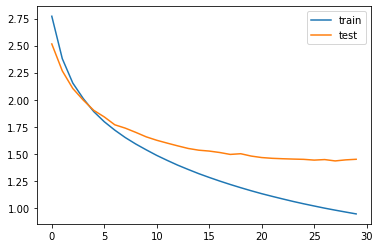

In [110]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### 인퍼런스 모델 구현

In [129]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

# 에러 수정 위한 임시 코드
#tar_index_to_word
print(tar_index_to_word)

{1: 'sostoken', 2: 'eostoken', 3: 'india', 4: 'us', 5: 'man', 6: 'pm', 7: 'govt', 8: 'delhi', 9: 'old', 10: 'trump', 11: 'world', 12: 'indian', 13: 'bjp', 14: 'crore', 15: 'cm', 16: 'report', 17: 'st', 18: 'modi', 19: 'new', 20: 'woman', 21: 'year', 22: 'first', 23: 'ex', 24: 'day', 25: 'cr', 26: 'time', 27: 'mumbai', 28: 'pak', 29: 'film', 30: 'years', 31: 'police', 32: 'yr', 33: 'people', 34: 'reports', 35: 'sc', 36: 'china', 37: 'women', 38: 'case', 39: 'get', 40: 'lakh', 41: 'ceo', 42: 'rahul', 43: 'killed', 44: 'video', 45: 'gets', 46: 'startup', 47: 'minister', 48: 'chief', 49: 'arrested', 50: 'says', 51: 'may', 52: 'uk', 53: 'th', 54: 'like', 55: 'win', 56: 'test', 57: 'yrs', 58: 'google', 59: 'death', 60: 'found', 61: 'made', 62: 'kohli', 63: 'pakistan', 64: 'mp', 65: 'team', 66: 'air', 67: 'prez', 68: 'shares', 69: 'wife', 70: 'record', 71: 'congress', 72: 'leader', 73: 'make', 74: 'korea', 75: 'held', 76: 'one', 77: 'car', 78: 'hc', 79: 'study', 80: 'court', 81: 'girl', 82: '

In [112]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [113]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [137]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        # 에러 해결 위해 추가한 코드 : 
        #### 패딩 토큰(0)을 건너뛰기 위해 조건 추가
#         if sampled_token_index == 0:
#             continue
        
        '''
        continue 문이 사용되었는데, 이는 루프의 현재 반복을 건너뛰고 다음 반복으로 넘어가게 만듦
        이 경우, 상태와 타겟 시퀀스가 업데이트되지 않아 무한 루프가 발생할 가능성이 있음
        수정해야 함 
        '''
        if sampled_token_index == 0:
            stop_condition = True
            continue
        
        
#         sampled_token = tar_index_to_word[sampled_token_index] # 에러 해결하며 함께 수정
        sampled_token = tar_index_to_word.get(sampled_token_index, '')

    
        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

#     return decoded_sentence
    return decoded_sentence.strip()

print('=3')

=3


In [138]:
# seq2text 함수처럼 요약문의 정수 시퀀스를 텍스트로 변환하는 seq2summary 함수 

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        # 0을 제외하고 sostoken과 eostoken도 건너뜀
        if (i != 0 and src_index_to_word[i] != 'sostoken' and src_index_to_word[i] != 'eostoken'):
            temp = temp + src_index_to_word[i] + ' '
    return temp.strip()

print('=3')


=3


In [139]:
# 에러 해결 위한 임시 코드

encoder_input_test[50]

# seq2summary(decoder_input_test[50]
encoder_input_test[50].reshape(1, text_max_len)

array([[  80, 7756,   72,  332, 3318, 6486,    1,  206, 5918,  195,   24,
        1684, 6420, 5070, 4135, 1661,  194,    4, 7756,    1,  789, 3500,
          10, 1206,  626,   10,   33, 3431,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]], dtype=int32)

## 4. 실제 결과와 요약문 비교하기 (추상적 요약)

In [141]:
    
'''
왜 오류가 발생했는가?
sampled_token_index가 0일 때, 딕셔너리 tar_index_to_word에서 해당하는 단어가 없어서 KeyError가 발생함
대부분의 경우 0은 패딩 토큰으로, 이를 무시하도록 코드 수정해야 함
=> sampled_token_index가 0인 경우, 즉 패딩 토큰인 경우 이를 무시하도록 코드를 수정
=> decode_sequence 함수에서 조건문을 추가해야 함 
'''


for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")
    


원문 : actress sana khan speaking casting couch said many cheap men would ask compromise funny taught words school added sana said feel happens people complete industry people like absolutely 
실제 요약 : said incident ruled loans alleged
예측 요약 : 


원문 : journalist turned politician ashish recently quit aam aadmi party sunday said party chief arvind kejriwal reason quit aap individual decision anyone added one half years full whether journey said 
실제 요약 : said real meet issued
예측 요약 : 


원문 : least people killed others injured saturday three bombs exploded afghanistan capital kabul funeral senior afghan politician son protested security situation country comes blast capital wednesday killed least people injured others 
실제 요약 : said team rally posts airlines four
예측 요약 : 


원문 : rss chief mohan bhagwat ordered tricolour kerala school independence day district collector issued memo terming inappropriate bhagwat however ignored order went national flag school notably comes amid ongoing politica

## 5. Summa을 이용해서 추출적 요약해보기

In [143]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [155]:
import requests
from summa.summarizer import summarize

import pandas as pd

In [156]:
text = pd.DataFrame(data['text'])

In [157]:
print(text[:1500])

                                                   text
0     Saurav Kant, an alumnus of upGrad and IIIT-B's...
1     Kunal Shah's credit card bill payment platform...
2     New Zealand defeated India by 8 wickets in the...
3     With Aegon Life iTerm Insurance plan, customer...
4     Speaking about the sexual harassment allegatio...
...                                                 ...
1495  India head coach Ravi Shastri has said that he...
1496  Italian tennis player Andreas Seppi ensured hi...
1497  World number three Roger Federer was stopped b...
1498  A cutout of TMC chief and West Bengal CM Mamat...
1499  A Delhi court on Saturday pulled up Delhi Poli...

[1500 rows x 1 columns]


### summarize 사용하기

In [158]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:


ValueError: Text parameter must be a Unicode object (str)!

In [159]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:


ValueError: Text parameter must be a Unicode object (str)!

In [160]:
print('Summary:')
print(summarize(text, words=50))

Summary:


ValueError: Text parameter must be a Unicode object (str)!

In [161]:
print('Summary:')
print(summarize(text, words=100))

Summary:


ValueError: Text parameter must be a Unicode object (str)!